In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading dataset:
data_salary=pd.read_csv(r'C:\Users\Datasets\adult.csv')
data_salary.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


# Data Preprocessing:

In [3]:
#checking datatypes of each variables:
data_salary.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [4]:
#Checking shape of dataframe:
data_salary.shape

(48842, 15)

In [5]:
# Checking for Null values:
data_salary.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [6]:
data_salary = data_salary[(data_salary.astype(str).applymap(lambda x: x.lower()) != '?').all(axis=1)]
data_salary.shape

(45222, 15)

In [7]:
data_salary.dtypes

age                 int64
workclass          object
fnlwgt              int64
education          object
educational-num     int64
marital-status     object
occupation         object
relationship       object
race               object
gender             object
capital-gain        int64
capital-loss        int64
hours-per-week      int64
native-country     object
income             object
dtype: object

In [8]:
# Checking value count for each columns/variables:
for i in data_salary.columns:
    print(data_salary[i].value_counts())

36    1283
33    1279
31    1274
35    1272
23    1241
      ... 
85       5
88       5
89       1
86       1
87       1
Name: age, Length: 74, dtype: int64
Private             33307
Self-emp-not-inc     3796
Local-gov            3100
State-gov            1946
Self-emp-inc         1646
Federal-gov          1406
Without-pay            21
Name: workclass, dtype: int64
203488    21
120277    18
125892    18
113364    17
126569    17
          ..
556660     1
340043     1
337992     1
124818     1
65584      1
Name: fnlwgt, Length: 26741, dtype: int64
HS-grad         14783
Some-college     9899
Bachelors        7570
Masters          2514
Assoc-voc        1959
11th             1619
Assoc-acdm       1507
10th             1223
7th-8th           823
Prof-school       785
9th               676
12th              577
Doctorate         544
5th-6th           449
1st-4th           222
Preschool          72
Name: education, dtype: int64
9     14783
10     9899
13     7570
14     2514
11     1959
7   

In [9]:
# Converting numerical variables into categorical variables:
data_salary['workclass'] = data_salary['workclass'].map({'Self-emp-inc': 0, 'State-gov': 1, 
                                                             'Federal-gov': 2, 'Without-pay': 3, 'Local-gov': 4, 
                                                             'Private': 5, 'Self-emp-not-inc': 6}).astype(int)


In [10]:
data_salary['education'] = data_salary['education'].map({'Some-college': 0, 'Preschool': 1, 
                                                        '5th-6th': 2, 'HS-grad': 3, 'Masters': 4, 
                                                        '12th': 5, '7th-8th': 6, 'Prof-school': 7,
                                                        '1st-4th': 8, 'Assoc-acdm': 9,
                                                        'Doctorate': 10, '11th': 11,
                                                        'Bachelors': 12, '10th': 13,
                                                        'Assoc-voc': 14,
                                                        '9th': 15}).astype(int)

In [11]:
data_salary['occupation'] = data_salary['occupation'].map({ 'Farming-fishing': 1, 'Tech-support': 2, 
                                          'Adm-clerical': 3, 'Handlers-cleaners': 4, 
                                         'Prof-specialty': 5,'Machine-op-inspct': 6, 
                                         'Exec-managerial': 7, 
                                         'Priv-house-serv': 8,
                                         'Craft-repair': 9, 
                                         'Sales': 10, 
                                         'Transport-moving': 11, 
                                         'Armed-Forces': 12, 
                                         'Other-service': 13,  
                                         'Protective-serv': 14}).astype(int)

In [12]:
data_salary['relationship'] = data_salary['relationship'].map({'Not-in-family': 0, 'Wife': 1, 
                                                             'Other-relative': 2, 
                                                             'Unmarried': 3, 
                                                             'Husband': 4, 
                                                             'Own-child': 5}).astype(int)

In [13]:
data_salary['income'] = data_salary['income'].map({'<=50K': 0, '>50K': 1}).astype(int)


In [14]:
data_salary['gender'] = data_salary['gender'].map({'Male': 0, 'Female': 1}).astype(int)

In [15]:
data_salary['marital-status'] = data_salary['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 1, 
                                                             'Married-civ-spouse': 2, 'Separated': 3, 'Divorced': 4, 
                                                             'Never-married': 5, 'Married-AF-spouse': 6}).astype(int)

In [16]:
data_salary['race'] = data_salary['race'].map({'Black': 0, 'Asian-Pac-Islander': 1, 'Other': 2, 'White': 3, 
                                             'Amer-Indian-Eskimo': 4}).astype(int)

In [17]:
data_salary.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,5,226802,11,7,5,6,5,0,0,0,0,40,United-States,0
1,38,5,89814,3,9,2,1,4,3,0,0,0,50,United-States,0
2,28,4,336951,9,12,2,14,4,3,0,0,0,40,United-States,1
3,44,5,160323,0,10,2,6,4,0,0,7688,0,40,United-States,1
5,34,5,198693,13,6,5,13,0,3,0,0,0,30,United-States,0


In [18]:
#dropping unnecessary data from the dataset 
data_salary.drop(['educational-num','age', 'hours-per-week', 'fnlwgt', 'capital-gain','capital-loss', 'native-country'], axis=1, inplace=True)

In [19]:
data_salary.head()

,workclass,education,marital-status,occupation,relationship,race,gender,income
0,5,11,5,6,5,0,0,0
1,5,3,2,1,4,3,0,0
2,4,9,2,14,4,3,0,1
3,5,0,2,6,4,0,0,1
5,5,13,5,13,0,3,0,0


# Exploratory Data Analysis:

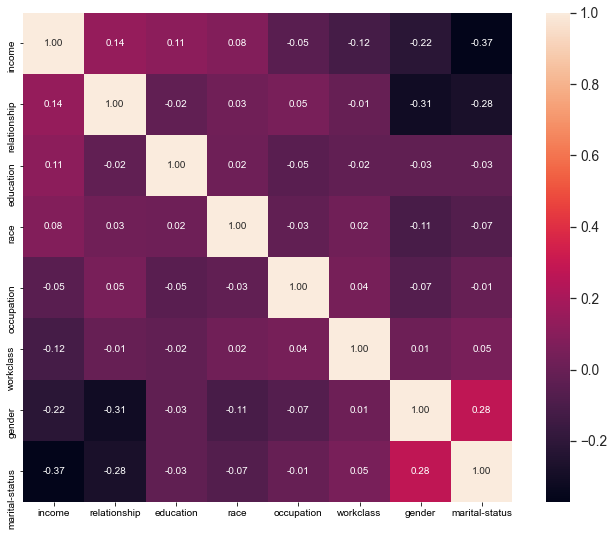

In [20]:
# Implementing Heatmap:
corr_data = data_salary.corr()
f, ax = plt.subplots(figsize=(12, 9))
k = 8 #number of variables for heatmap
cols = corr_data.nlargest(k, 'income')['income'].index
cm = np.corrcoef(data_salary[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()


<AxesSubplot:xlabel='education'>

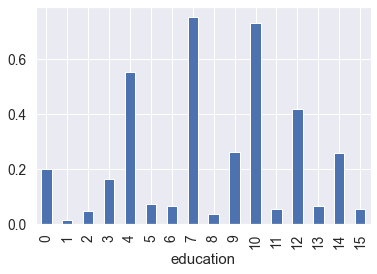

In [21]:
#Relationship Between education and income: 
data_salary.groupby('education').income.mean().plot(kind='bar')

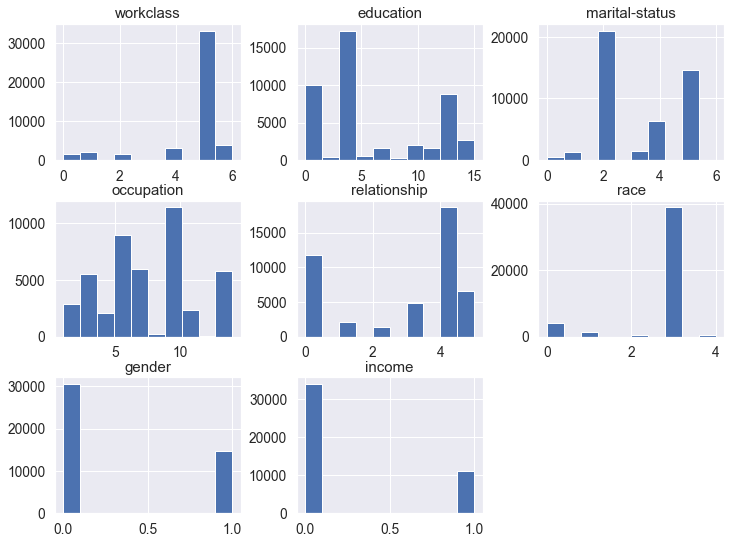

In [22]:
# Plotting Histogram for each variables:
data_salary.hist(figsize=(12,9))
plt.show()

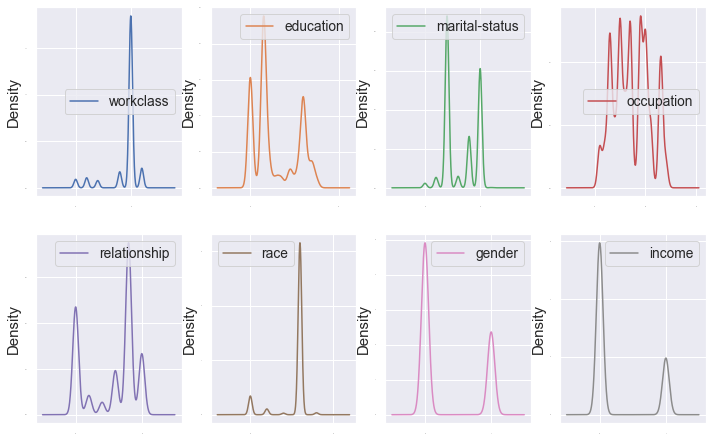

In [23]:
# Density plots
data_salary.plot(kind='density', subplots=True, layout=(4,4), sharex=False, legend=True, fontsize=1, figsize=(12,16))
plt.show()

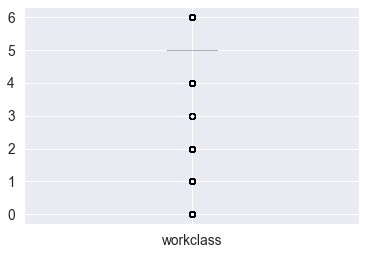

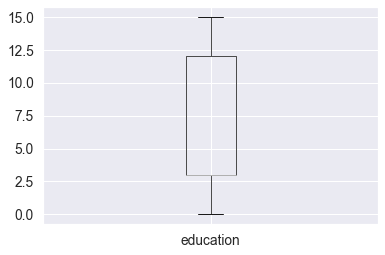

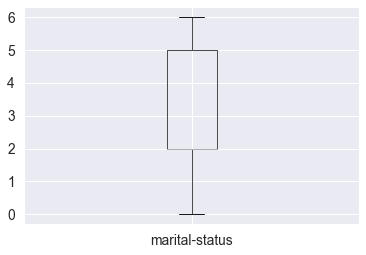

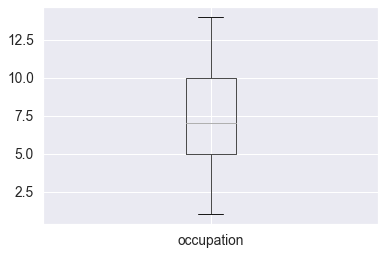

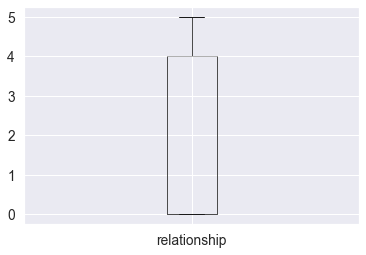

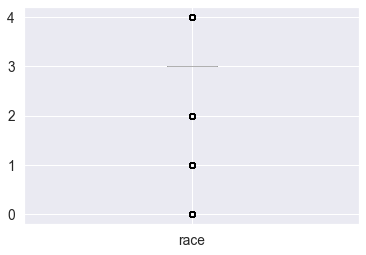

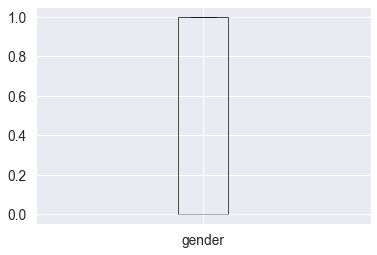

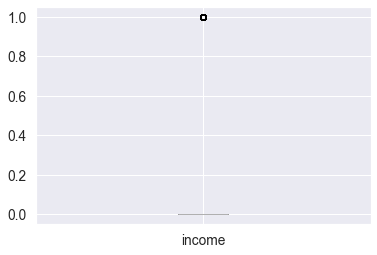

In [24]:
# Boxplot
import matplotlib.pyplot as plt
for column in data_salary:
    plt.figure()
    data_salary.boxplot([column])

<AxesSubplot:xlabel='marital-status'>

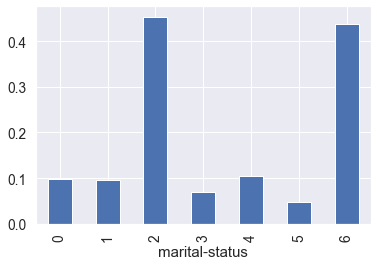

In [25]:
# Race vs Income
data_salary.groupby('marital-status').income.mean().plot(kind='bar')

<AxesSubplot:xlabel='gender'>

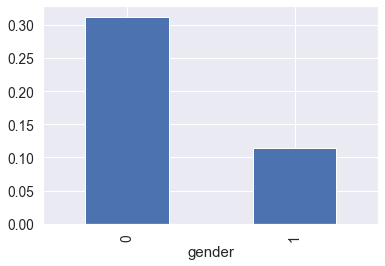

In [26]:
#Age vs Income: 
data_salary.groupby('gender').income.mean().plot(kind='bar')

# Predictive Model:

In [27]:
# Logistic Regression:
df_x=data_salary.drop(['income'],axis=1)
df_y=data_salary['income']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
LR = LogisticRegression()
#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=42)
#Train our model with the training data
LR.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31655, 7)
(13567, 7)
(31655,)
(13567,)


In [28]:
# Predicting Income:
y_pred=LR.predict(x_test)
print(y_pred)

[1 0 0 ... 0 0 0]


In [29]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
cnf_matrix =confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9610,  631],
       [2597,  729]], dtype=int64)

In [30]:
# Accuracy of model:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.7620697280165106


In [31]:
# Decision Tree:
df_x=data_salary.drop(['income'],axis=1)
df_y=data_salary['income']

from sklearn.tree import DecisionTreeClassifier

#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=42)
#Train our model with the training data
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31655, 7)
(13567, 7)
(31655,)
(13567,)


In [32]:
# Predicting Income:
y_pred=model.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [33]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
cnf_matrix =confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9317,  924],
       [1512, 1814]], dtype=int64)

In [34]:
# Accuracy of model:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8204466720719392


In [35]:
# Random forests:
from sklearn.ensemble import RandomForestClassifier
df_x=data_salary.drop(['income'],axis=1)
df_y=data_salary['income']
from sklearn.model_selection import train_test_split 
#Split the data into 67% training and 33% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=42)
#Train our model with the training data
RF=RandomForestClassifier(n_estimators=100)
RF.fit(x_train, y_train)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(31655, 7)
(13567, 7)
(31655,)
(13567,)


In [36]:
# Predicting Income:
y_pred=RF.predict(x_test)
print(y_pred)

[0 0 0 ... 0 0 0]


In [37]:
#confusion matrix 
from sklearn.metrics import confusion_matrix
cnf_matrix =confusion_matrix(y_test, y_pred)
cnf_matrix

array([[9318,  923],
       [1460, 1866]], dtype=int64)

In [38]:
# Accuracy of model:
from sklearn.metrics import accuracy_score
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8243532099948404


# K-Fold Cross Validation:


In [40]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

n_splits = 10

# for each time the process is repeated
seed = 7

# split the whole dataset into folds
kfold = KFold(n_splits, random_state=seed,shuffle=True)

# for Random Forest, we can use the accuracy level to evaluate the model / algorithm
scoring = 'accuracy'
# train the model and run K-fold cross validation to validate / evaluate the model
results = cross_val_score(RF,df_x,df_y, cv=kfold, scoring=scoring)
# print the evaluationm results
# result: the average of all the results obtained from the K-fold cross validation

print("Accuracy: %.3f (%.3f)" % (results.mean(), results.std()))     # Mean and Std of results

Accuracy: 0.823 (0.004)


# Hyperparameter Tuning:


In [41]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(RF.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [42]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [ ]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RF, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(x_train, y_train)